### Look at the Data

## Context
Since 2008, guests and hosts have used Airbnb to travel in a more unique, personalized way. As part of the Airbnb Inside initiative, this dataset describes the listing activity of homestays in Seattle, WA.

## Content
The following Airbnb activity is included in this Seattle dataset:

* Listings, including full descriptions and average review score
* Reviews, including unique id for each reviewer and detailed comments
* Calendar, including listing id and the price and availability for that day

### We shall look to answer the following

#### Time
* What are the busiest times of the year to visit Seattle? 
* During what part of year do hosts signups the most?
#### Property 
* What kind of property types are most popular in Seattle area?
* What kind of room types are more popular in Seattle area?
#### Location
* Where in Seattle are the most hosts and super hosts (experienced hosts) located?
* What locations have the most expensive and least expensive places.

In [120]:
### Read the data 
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from IPython import display
%matplotlib inline

reviews = pd.read_csv('./Downloads/airbnb/reviews.csv')
listings = pd.read_csv('./Downloads/airbnb/listings.csv')
calendar = pd.read_csv('./Downloads/airbnb/calendar.csv')


calendar.head()


,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


In [121]:
# check for no of rows and null values
print(calendar.shape)
calendar.info()

(1393570, 4)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1393570 entries, 0 to 1393569
Data columns (total 4 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   listing_id  1393570 non-null  int64 
 1   date        1393570 non-null  object
 2   available   1393570 non-null  object
 3   price       934542 non-null   object
dtypes: int64(1), object(3)
memory usage: 42.5+ MB


###  Part 1 : What is the busisiest time to visit seaatle

# Steps
1. extract month from date 
2. group by month the availability
3. hosts signups trends



In [34]:
# extract month in words from date column 
calendar['time'] = pd.to_datetime(calendar['date'])
calendar['month'] = calendar.time.dt.month_name()
calendar.drop('time', axis=1, inplace=True)
calendar.head()

<AxesSubplot:xlabel='month'>

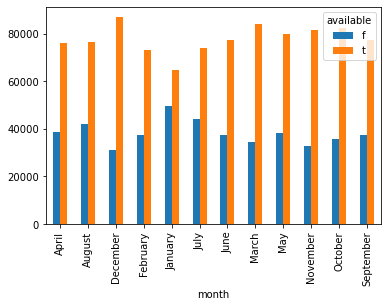

In [36]:
# group by month and available

calendar.groupby(['month', 'available']).agg('size').unstack().plot(kind = 'bar', legend=True)



In [40]:
# drop columns where price is null
calendar_price = calendar.dropna()

In [43]:
def clean_currency(x):
    """ If the value is a string, then remove currency symbol and delimiters
    otherwise, the value is numeric and can be converted
    """
    if isinstance(x, str):
        return(x.replace('$', '').replace(',', ''))
    return(x)

In [44]:
calendar_price['price'] = calendar_price['price'].apply(clean_currency).astype('float')


<ipython-input-44-bacc6d88effb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  calendar_price['price'] = calendar_price['price'].apply(clean_currency).astype('float')


In [64]:
calendar_price.head()

,listing_id,date,available,price,month
0,241032,2016-01-04,t,85.0,January
1,241032,2016-01-05,t,85.0,January
9,241032,2016-01-13,t,85.0,January
10,241032,2016-01-14,t,85.0,January
14,241032,2016-01-18,t,85.0,January


<AxesSubplot:xlabel='month'>

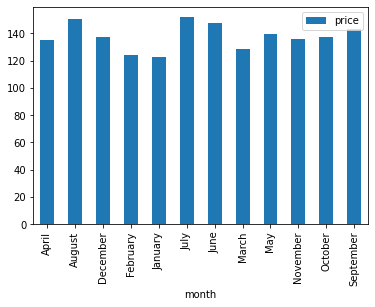

In [47]:
calendar_price.groupby('month')['price'].agg('mean').transpose().plot(kind = 'bar', legend=True)


### Host signups

In [67]:
# extract month in words from date column 
listings['listed_date'] = pd.to_datetime(listings['host_since'])
listings['listed_month'] = listings.listed_date.dt.month_name()
listings.drop('listed_date', axis=1, inplace=True)


In [72]:
grp_cnt = listings.groupby(['listed_month'])['listed_month'].count()

In [74]:
grp_cnt.sort_values()

listed_month
December     208
February     271
January      271
April        278
November     293
June         296
March        299
October      313
September    330
May          352
July         415
August       490
Name: listed_month, dtype: int64

## Part 1 : Observation 
### As we can clearly see from the 3 graphs above , the demand is high during the month June , July , August and so are the prices of the listing , thus confirming the bussiest time of the year in Seattle

### also when we see the hosts signups , we conclude that July,August are the most promising time of the year to list your property


## Part 2:   Property Types:
 ### a. What kind of property types are most popular in Seattle area?
 ### b. What kind of room types are more popular in Seattle area?


In [50]:
listings.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


In [52]:
listings.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'thumbnail_url', 'medium_url', 'picture_url',
       'xl_picture_url', 'host_id', 'host_url', 'host_name', 'host_since',
       'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',
       'host_listings_count', 'host_total_listings_count',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'street', 'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', '

<AxesSubplot:ylabel='property_type'>

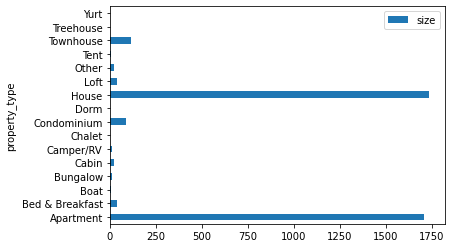

In [58]:
listings.groupby('property_type')['property_type'].agg(['size']).plot(kind='barh',legend='True')


<AxesSubplot:ylabel='room_type'>

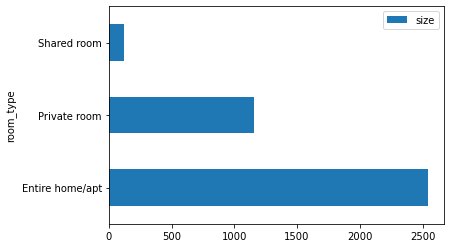

In [59]:
listings.groupby('room_type')['room_type'].agg(['size']).plot(kind='barh',legend='True')


### Part 2 Observation 
#### As you see above around 95% of property types are House & Apartments and aboutt 65% of population rent entire home / apartment ,
#### suggesting the fact that house / apartment are the most favoured in seattle area

##  Part 3 : Location
##### Where in Seattle are the most hosts and super hosts (experienced hosts) located?
##### What locations have the most expensive and least expensive places.

In [75]:
listings['host_is_superhost']

0       f
1       t
2       f
3       f
4       f
       ..
3813    f
3814    f
3815    f
3816    f
3817    f
Name: host_is_superhost, Length: 3818, dtype: object

In [103]:
listings['neighbourhood'] 

0        Queen Anne
1        Queen Anne
2        Queen Anne
3        Queen Anne
4        Queen Anne
           ...     
3813        Fremont
3814    Portage Bay
3815            NaN
3816            NaN
3817     Queen Anne
Name: neighbourhood, Length: 3818, dtype: object

In [78]:
def clean_street(x):
    """ If the value is a string, then remove currency symbol and delimiters
    otherwise, the value is numeric and can be converted
    """
    if isinstance(x, str):
        return(x.split(',')[0])
    return(x)

In [79]:
#listings['street'] = listings['neighbourhood'].apply(clean_street).astype('str')


In [104]:
super_host=listings.groupby(['neighbourhood', 'host_is_superhost']).agg('size')


In [105]:
super_host

neighbourhood   host_is_superhost
Alki            f                    20
                t                     3
Arbor Heights   f                     2
                t                     1
Atlantic        f                    39
                                     ..
Westlake        f                    11
                t                     1
Windermere      f                     9
                t                     1
Yesler Terrace  f                    12
Length: 149, dtype: int64

In [106]:
super_host=listings[listings['host_is_superhost']=='t'].groupby(['neighbourhood'])['host_is_superhost'].agg('size').sort_values(ascending=False).head(10)

In [107]:
super_host

neighbourhood
Capitol Hill        62
Ballard             57
Minor               52
Queen Anne          39
Belltown            38
Fremont             35
Wallingford         33
First Hill          21
Columbia City       19
Lower Queen Anne    18
Name: host_is_superhost, dtype: int64

<AxesSubplot:xlabel='neighbourhood'>

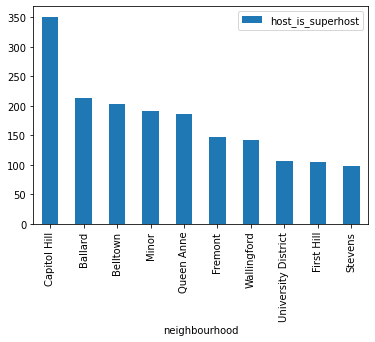

In [114]:
listings.groupby('neighbourhood')['host_is_superhost'].agg('size').nlargest(10).plot(kind = 'bar', legend=True)


In [117]:
#get all data where hosts are superhost
super_host = listings[listings['host_is_superhost']=='t']
#get count of superhost in each neighborhood
sh_count = super_host.groupby('neighbourhood_cleansed')['host_is_superhost'].count().sort_values(ascending=False).reset_index().rename(columns={'host_is_superhost':'super_host_count','neighbourhood_cleansed' : 'name'})

In [118]:
# Get host count per neighborhood

h_count = listings.groupby('neighbourhood_cleansed')['host_id'].count().sort_values(ascending=False).reset_index().rename(columns={'host_id':'host_count','neighbourhood_cleansed' : 'name'})

Text(0.5, 1.0, 'HOST Vs SUPER HOST COUNT PER NEIGHBORHOOD - TOP 10')

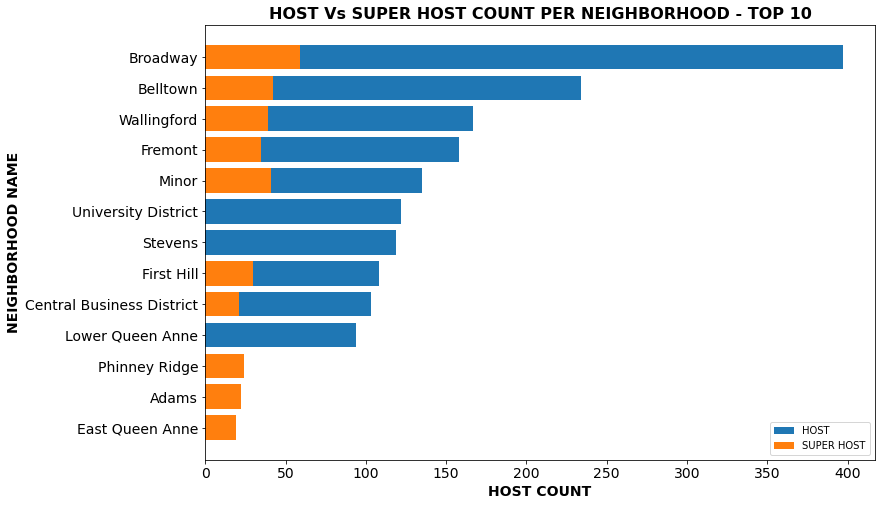

In [119]:
# plot the top 10 neighborhoods with highest super host count
n_name = h_count['name'].head(10)
count = h_count['host_count'].head(10)

n_name_1 = sh_count['name'].head(10)
count_1 = sh_count['super_host_count'].head(10)

fig,ax = plt.subplots(figsize=(12,8))
ax.invert_yaxis()

ax.barh(n_name, count, label = "HOST")
ax.legend(loc="lower right")
ax.barh(n_name_1, count_1, label = "SUPER HOST")
ax.legend(loc="lower right")

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
ax.set_xlabel('HOST COUNT',fontsize=14, weight="bold")
ax.set_ylabel('NEIGHBORHOOD NAME',fontsize=14, weight="bold")
ax.set_title('HOST Vs SUPER HOST COUNT PER NEIGHBORHOOD - TOP 10',fontsize=16, weight="bold")

#### Part 3 : Observation
##### Broadway neighborhood has by far the most number of hosts and super-hosts. There are few places where all hosts are super-hosts.
